# <font color='#9980F2'> Website Traffic Foreacsting

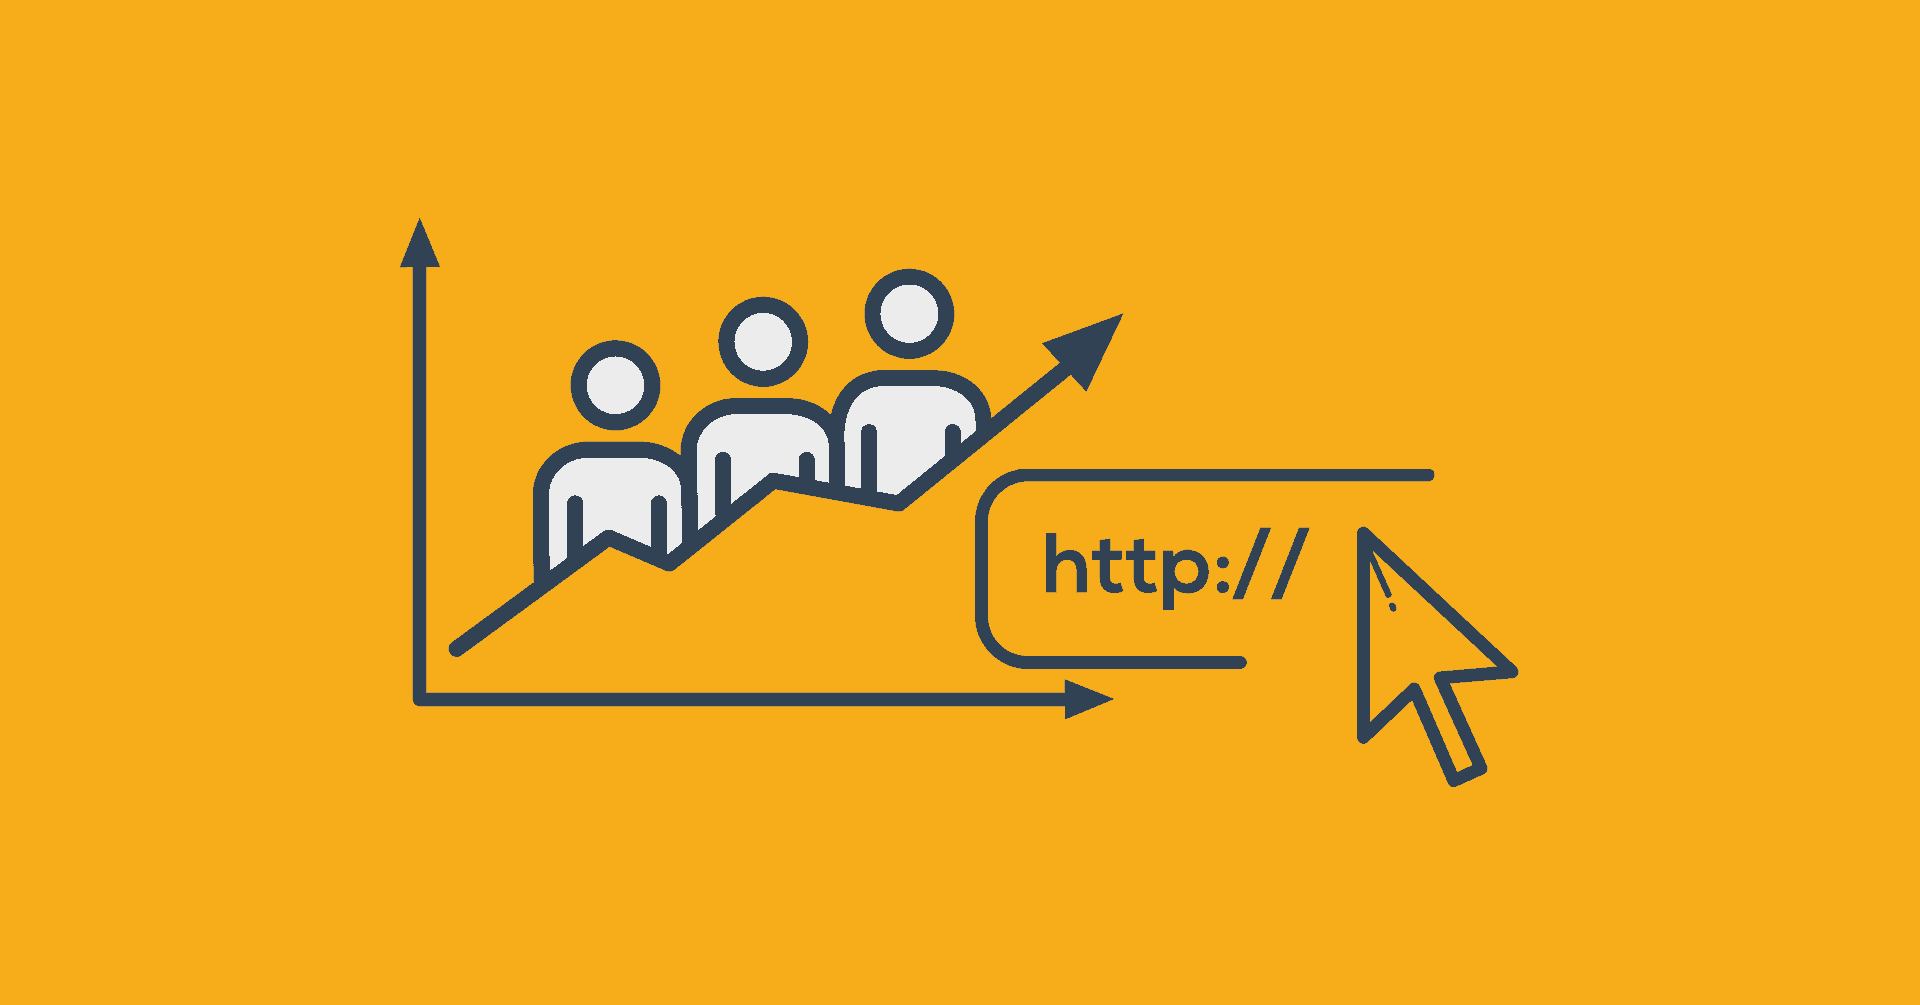

# <font color='#9980F2'> 📊 Website Traffic Prediction

## <font color='#9980F2'>🏆 Aim  
The goal of this project is to **predict website traffic** based on historical data.  
By analyzing past trends in daily website views, we aim to develop a time series forecasting model that can estimate future traffic.  

This prediction will help in:  
- Identifying traffic patterns 📈  
- Planning for server scalability ⚙️  
- Optimizing marketing strategies 🎯  

Using **time series analysis** and **machine learning models** like ARIMA, LSTM, or Prophet, we will forecast the number of website views for upcoming days.  

---

## <font color='#9980F2'> 📂 Dataset Explanation  

The dataset consists of **two columns**:  

- **Date** 📅: Represents the daily timestamp of website visits (format: `DD/MM/YYYY`).  
- **Views** 👀: Indicates the total number of website visits recorded on that particular date.  


### <font color='#9980F2'>📌 Key Features  
✅ **Daily recorded website views** spanning over **one year**  
✅ **Sequential time-series data** suitable for forecasting  
✅ Can be used for **predicting future website traffic trends**  

---

We will now preprocess the data, visualize traffic trends, and apply machine learning models for accurate forecasting. 🚀  

## <font color='#9980F2'> Requirements

In [86]:
import pandas as pd
from datetime import date,timedelta
import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## <font color='#9980F2'> Import Data

In [11]:
df=pd.read_csv('Thecleverprogrammer.csv')

## <font color='#9980F2'> EDA (Exploratory Data Analysis)

In [16]:
df.head()

,Date,Views
0,01/06/2021,7831
1,02/06/2021,7798
2,03/06/2021,7401
3,04/06/2021,7054
4,05/06/2021,7973


In [20]:
df.tail()

,Date,Views
386,22/06/2022,11154
387,23/06/2022,10382
388,24/06/2022,9555
389,25/06/2022,8502
390,26/06/2022,8368


In [18]:
df.shape

(391, 2)

In [26]:
df.isnull().sum()

Date     0
Views    0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    391 non-null    object
 1   Views   391 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.2+ KB


## <font color='#9980F2'> Feature Engineering

In [40]:
df['Date']=pd.to_datetime(df['Date'],format='%d/%m/%Y')

## <font color='#9980F2'> Data Visualization

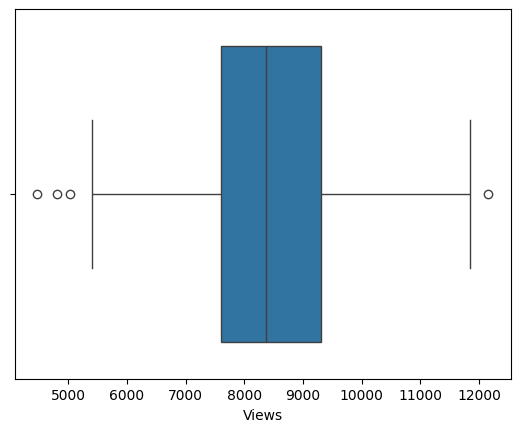

In [36]:
sns.boxplot(x=df['Views']);

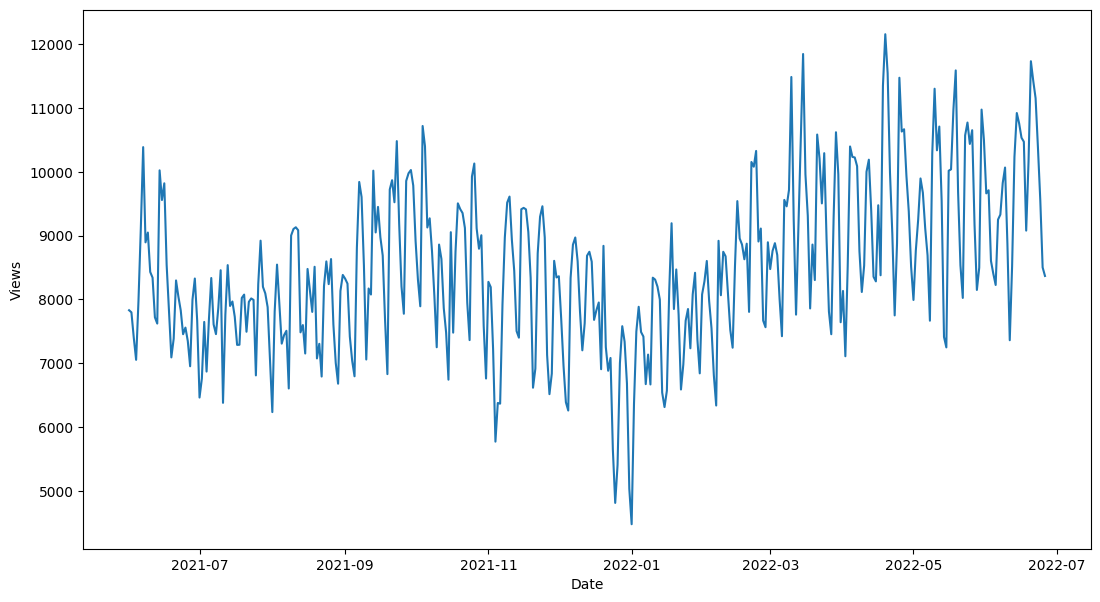

In [56]:
plt.figure(figsize=(13,7))
sns.lineplot(y=df['Views'],x=df['Date']);

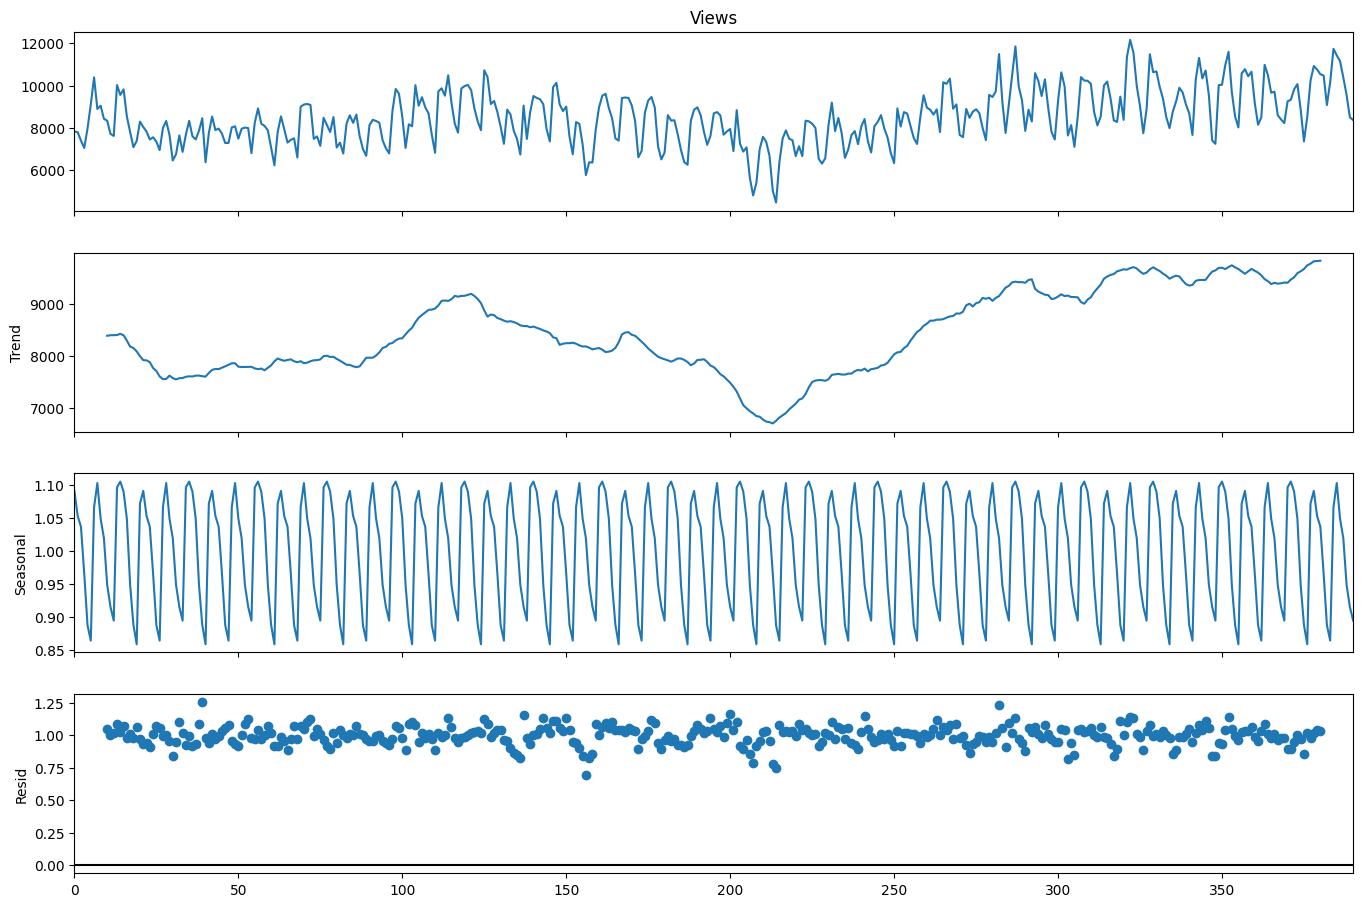

In [58]:
result=seasonal_decompose(df["Views"],model="multiplicative",period=21)
fig=result.plot()
fig.set_size_inches(15,10)

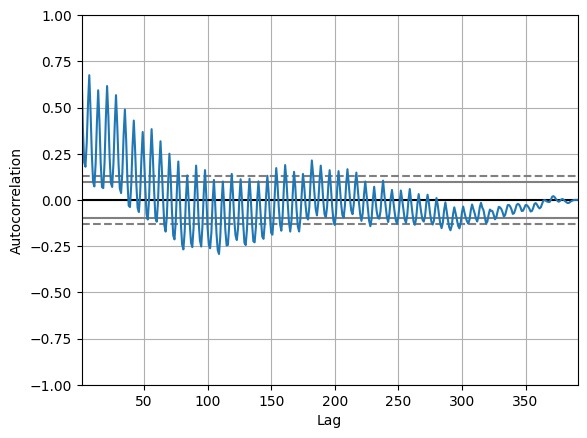

In [60]:
pd.plotting.autocorrelation_plot(df["Views"]);

In [70]:
model=sm.tsa.statespace.SARIMAX(df['Views'],
                                order=(5, 1, 2),
                                seasonal_order=( 5, 1, 2, 12))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Views   No. Observations:                  391
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -3099.311
Date:                            Tue, 04 Feb 2025   AIC                           6228.623
Time:                                    23:24:06   BIC                           6287.646
Sample:                                         0   HQIC                          6252.048
                                            - 391                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7619      0.127      5.977      0.000       0.512       1.012
ar.L2         -0.8133      0.134     -6.059      0.000      -1.076      -0.550
ar.L3         -0.1307      0.169     -0.774      0.439      -0.462       0.200
ar.L4         -0.2032      0.150     -1.357      0.175      -0.497       0.090
ar.L5         -0.1718      0.133     -1.295      0.195      -0.432       0.088
ma.L1         -1.1778      0.083    -14.261      0.000      -1.340      -1.016
ma.L2          0.9037      0.070     12.935      0.000       0.767       1.041
ar.S.L12      -0.2351      3.111     -0.076      0.940      -6.333       5.862
ar.S.L24       0.0445      0.219      0.203      0.839      -0.385       0.474
ar.S.L36      -0.1240      0.180     -0.690      0.490      -0.476       0.228
ar.S.L48      -0.1854      0.477     -0.389      0.698      -1.121       0.750
ar.S.L60       0.0116      0.582      0.020      0.984      -1.129       1.152
ma.S.L12      -0.6424      3.109     -0.207      0.836      -6.736       5.451
ma.S.L24      -0.1979      2.624     -0.075      0.940      -5.341       4.945
sigma2      1.257e+06   8.58e-06   1.47e+11      0.000    1.26e+06    1.26e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 1.79
Prob(Q):                              0.84   Prob(JB):                         0.41
Heteroskedasticity (H):               1.09   Skew:                             0.17
Prob(H) (two-sided):                  0.62   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.9e+28. Standard errors may be unstable.
"""

In [80]:
predictions=model.predict(len(df),len(df)+50)
predictions

391     9812.620268
392    10828.421613
393    10783.935868
394     9860.716482
395     8953.447159
396     8425.122369
397     8911.608148
398     9687.790355
399    10395.916206
400    10588.713422
401     9866.116999
402     9267.931334
403     8921.797378
404     8979.879925
405    10273.917761
406    10861.742027
407    10804.155840
408    10002.013449
409     9378.232735
410     8559.804255
411     9035.354838
412    10158.960332
413    10624.698929
414    10850.601229
415    10267.170589
416     9420.554061
417     8957.695405
418     9082.137055
419     9921.871377
420    10356.018844
421    10777.825814
422     9971.269999
423     9550.345768
424     8921.420983
425     8798.879241
426    10052.655651
427    10819.719484
428    10909.752426
429    10324.722126
430     9380.889369
431     8615.879905
432     8616.868342
433     9979.447960
434    10509.416524
435    10862.998003
436    10399.713746
437     9350.209508
438     9144.323089
439     9297.810565
440    10206.533964


<Axes: >

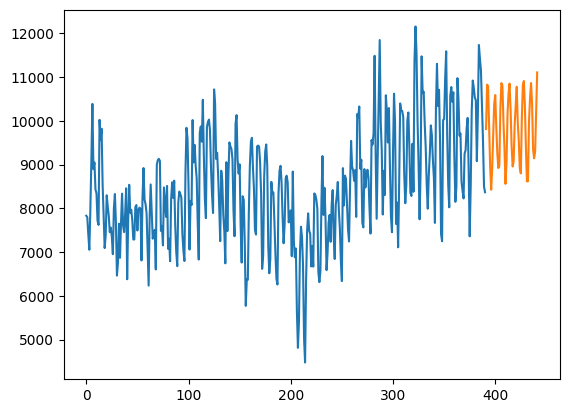

In [82]:
df["Views"].plot()
predictions.plot()

## <font color='#9980F2'>🎯 Conclusion  

In this project, we successfully **predicted website traffic** for the next **50 days** using time series forecasting techniques.  
By analyzing historical data and leveraging machine learning models, we estimated future website views with a high degree of accuracy.  

### <font color='#9980F2'> 🔍 Key Findings  
✅ The model effectively captured **traffic patterns** and **seasonal trends**.  
✅ Predictions showed **fluctuations in website views**, indicating potential variations in user engagement.  
✅ The forecasted values provide insights for **server optimization, marketing strategies, and content planning**.  

This project demonstrates the power of **time series forecasting** in **website traffic analysis**, helping businesses make **data-driven decisions** for future growth. 📊✨  
